<a href="https://colab.research.google.com/github/Qualot/deep-learning-from-scratch/blob/colab/ch04/TwoLayeresNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from tqdm import tqdm

In [2]:
np.set_printoptions(linewidth=10000)

#common functions

In [3]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [4]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) #prevents overflow
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [5]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [6]:
def _numerical_gradient_wo_batch(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    #f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x+h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [7]:
def numerical_gradient(f, x):
  if x.ndim == 1:
    return _numerical_gradient_wo_batch(f, x)

  grad = np.zeros_like(x)
  for key, xvec in enumerate(x):
    grad[key] = _numerical_gradient_wo_batch(f, xvec)

  return grad

#Load MNIST and postprocessing (normalize, flatten, one-hot)

11490434/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0  

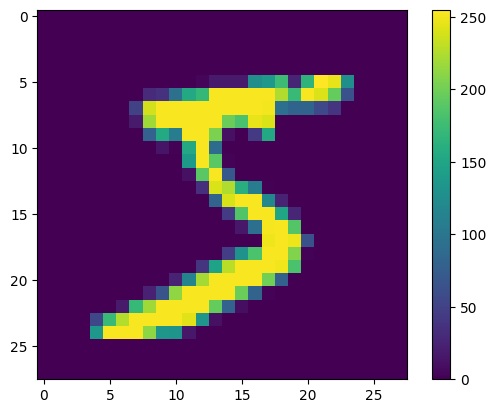

In [8]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train[0])
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

#flatten
x_train, t_train, x_test, t_test = [arr.reshape(arr.shape[0], -1) for arr in (x_train, t_train, x_test, t_test)]

#one-hot
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

#TwoLayerNet class

In [10]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    #initialize weights and biasses
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  #x: input data, t: teacher data
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  #x: input, t: teacher
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    return grads

#Practice part (argmax() for accuracy)

In [11]:
a = np.random.randn(10, 5)
print(a)
b = np.random.randn(10, 5)
print(b)

a = np.argmax(a, axis=1)
b = np.argmax(b, axis=1)
print(a)
print(b)
print(a==b)

[[ 0.98208625  0.32020044 -0.82084384  0.50199006  0.14913709]
 [-1.85736374  0.44286967 -0.01884231 -0.15321019  0.54285699]
 [ 1.40507445 -1.43167382 -1.00704343 -1.35775711 -0.92473039]
 [-0.17515963 -1.69013163  0.23274083  0.84780034 -0.16342035]
 [ 0.24459646  0.37820918 -1.06899712 -0.74815744 -0.75432012]
 [ 0.78006626 -0.58510539 -0.52007155  0.23444494 -1.58490894]
 [-0.02652968  1.15462444  0.00496737 -0.37791509  0.36073353]
 [ 0.69721764 -1.42024447  0.129214    0.45459346  0.45177176]
 [ 0.20373951  0.34240588 -0.56850558 -0.56298737  0.01788319]
 [ 0.06646386 -0.91767901 -2.03985519 -0.98395965  0.93953416]]
[[ 0.16471365  0.17190383 -2.34122547  2.30839356 -1.04712367]
 [ 0.99637666 -0.10748344 -1.57888407 -0.67949569  1.57696411]
 [ 1.13184135 -1.03492081 -1.04032776  1.47458794 -2.21044251]
 [ 0.27781647 -1.1012844   0.76473953 -0.13168463  1.86475675]
 [ 1.5632683  -1.65665126  0.30559533 -1.33324666 -1.13259801]
 [ 1.65796317 -1.45415049  0.3811474   1.46380618  0.5

In [12]:
alist = np.random.randn(10, 2)
print(alist)
for key, avec in enumerate(alist):
  print(f"{key} th ... {avec}")

[[-0.24824975  0.05776084]
 [-0.33265482  0.2743301 ]
 [-1.06921711 -0.42657359]
 [ 0.1528224  -0.71543241]
 [-1.80074978 -1.8005067 ]
 [ 0.2688271   0.03989287]
 [-0.72119293 -0.14675108]
 [-0.82406509 -0.85600575]
 [ 0.15856476 -0.18759444]
 [ 2.07483548 -1.23103483]]
0 th ... [-0.24824975  0.05776084]
1 th ... [-0.33265482  0.2743301 ]
2 th ... [-1.06921711 -0.42657359]
3 th ... [ 0.1528224  -0.71543241]
4 th ... [-1.80074978 -1.8005067 ]
5 th ... [0.2688271  0.03989287]
6 th ... [-0.72119293 -0.14675108]
7 th ... [-0.82406509 -0.85600575]
8 th ... [ 0.15856476 -0.18759444]
9 th ... [ 2.07483548 -1.23103483]


#Practice part (TwoLayerNet)

In [13]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [14]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [17]:
t = np.random.rand(100, 10)
#grads = net.numerical_gradient(x, t)

#Practice part (using MNIST)

In [18]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
#normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

#flatten
x_train, t_train, x_test, t_test = [arr.reshape(arr.shape[0], -1) for arr in (x_train, t_train, x_test, t_test)]

#one-hot
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

train_loss_list = []

#hyperparameters
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [19]:
for i in tqdm(range(iters_num)):
  #getting mini batch
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #calculating gradient
  grad = network.numerical_gradient(x_batch, t_batch)
  #grad = network.numerical_gradient(x_batch, t_batch) # high speed using backpropergation

  #updating parameters
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #recording the learning process
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  1%|          | 1/100 [01:27<2:24:31, 87.59s/it]


KeyboardInterrupt: ignored

In [ ]:
x_points = np.arange(iters_num)
print(x_points)
print(train_loss_list)
plt.plot(x_points, train_loss_list)